In [2]:
import pandas_datareader as pdr

In [3]:
key = "fc7ac86a44d2346062fddd2f060ca6110b3cc3e1"

In [4]:
df = pdr.get_data_tiingo('MSFT',api_key=key)

In [5]:
df.to_csv('MSFT.csv')

In [6]:
df.head()

close   high    low   open    volume  \
symbol date                                                              
MSFT   2017-11-13 00:00:00+00:00  83.93  83.94  83.46  83.66  14080820   
       2017-11-14 00:00:00+00:00  84.05  84.10  82.98  83.50  18604034   
       2017-11-15 00:00:00+00:00  82.98  83.69  82.69  83.47  19097333   
       2017-11-16 00:00:00+00:00  83.20  83.42  82.94  83.10  20659209   
       2017-11-17 00:00:00+00:00  82.40  83.12  82.24  83.12  21715498   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
MSFT   2017-11-13 00:00:00+00:00  78.843708  78.853102  78.402191  78.590070   
       2017-11-14 00:00:00+00:00  78.956436  79.003406  77.951280  78.439767   
       2017-11-15 00:00:00+00:00  78.345827  79.016176  78.072022  78.808462   
       2017-11-16 00:00:00+00:00  78.553541  78.761254  78.308061  78.459125   
       2017-11-17 00:00:00+00:00  77.798218  78.478008  77.647154  78.478008   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
MSFT   2017-11-13 00:00:00+00:00   14080820     0.00          1.0  
       2017-11-14 00:00:00+00:00   18604034     0.00          1.0  
       2017-11-15 00:00:00+00:00   19097333     0.42          1.0  
       2017-11-16 00:00:00+00:00   20659209     0.00          1.0  
       2017-11-17 00:00:00+00:00   21715498     0.00          1.0

In [6]:
df.tail()

close    high     low    open    volume  \
symbol date                                                                  
MSFT   2022-08-23 00:00:00+00:00  276.44  278.86  275.40  276.44  17527409   
       2022-08-24 00:00:00+00:00  275.79  277.23  275.11  275.41  18137019   
       2022-08-25 00:00:00+00:00  278.85  279.02  274.52  277.33  16583407   
       2022-08-26 00:00:00+00:00  268.09  280.34  267.98  279.08  27549307   
       2022-08-29 00:00:00+00:00  265.23  267.40  263.85  265.85  20121371   

                                  adjClose  adjHigh  adjLow  adjOpen  \
symbol date                                                            
MSFT   2022-08-23 00:00:00+00:00    276.44   278.86  275.40   276.44   
       2022-08-24 00:00:00+00:00    275.79   277.23  275.11   275.41   
       2022-08-25 00:00:00+00:00    278.85   279.02  274.52   277.33   
       2022-08-26 00:00:00+00:00    268.09   280.34  267.98   279.08   
       2022-08-29 00:00:00+00:00    265.23   267.40  263.85   265.85   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
MSFT   2022-08-23 00:00:00+00:00   17527409      0.0          1.0  
       2022-08-24 00:00:00+00:00   18137019      0.0          1.0  
       2022-08-25 00:00:00+00:00   16583407      0.0          1.0  
       2022-08-26 00:00:00+00:00   27549307      0.0          1.0  
       2022-08-29 00:00:00+00:00   20121371      0.0          1.0

In [7]:
df1=df.reset_index()['close']
df1

0        74.77
1        73.94
2        73.61
3        73.40
4        74.34
         ...  
1252    276.44
1253    275.79
1254    278.85
1255    268.09
1256    265.23
Name: close, Length: 1257, dtype: float64

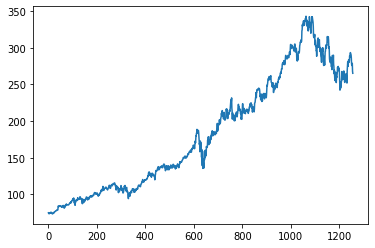

In [11]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [25]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [26]:
df1

array([[0.0055957 ],
       [0.00251992],
       [0.00129702],
       ...,
       [0.7618677 ],
       [0.7219937 ],
       [0.71139522]])

In [27]:
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]
training_size,test_size

(879, 378)

In [28]:
import numpy as np
def create_dataset(dataset,time_step=1):
    datax,datay=[], []
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        datax.append(a)
        datay.append(dataset[i+time_step,0])
    return np.array(datax), np.array(datay)

In [29]:
time_step=100
x_train,y_train = create_dataset(train_data, time_step)
x_test,y_test = create_dataset(test_data, time_step)

In [30]:
print(x_train.shape),print(y_train.shape)

(778, 100)
(778,)


(None, None)

In [31]:
print(x_test.shape),print(y_test.shape)

(277, 100)
(277,)


(None, None)

In [32]:
#creating stacked lstm model
#lstm requires data in 3 dimensions so
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1], 1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1], 1)

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [34]:
model= Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [35]:
model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=100,batch_size=64, verbose=1)

Epoch 1/100
13/13 [==============================] - 6s 186ms/step - loss: 0.0249 - val_loss: 0.0895
Epoch 2/100
13/13 [==============================] - 2s 120ms/step - loss: 0.0042 - val_loss: 0.0043
Epoch 3/100
13/13 [==============================] - 1s 113ms/step - loss: 0.0011 - val_loss: 0.0075
Epoch 4/100
13/13 [==============================] - 1s 108ms/step - loss: 8.2320e-04 - val_loss: 0.0025
Epoch 5/100
13/13 [==============================] - 1s 111ms/step - loss: 6.0993e-04 - val_loss: 0.0030
Epoch 6/100
13/13 [==============================] - 1s 113ms/step - loss: 6.1870e-04 - val_loss: 0.0026
Epoch 7/100
13/13 [==============================] - 1s 113ms/step - loss: 6.0162e-04 - val_loss: 0.0029
Epoch 8/100
13/13 [==============================] - 2s 118ms/step - loss: 6.1417e-04 - val_loss: 0.0032
Epoch 9/100
13/13 [==============================] - 2s 121ms/step - loss: 5.9508e-04 - val_loss: 0.0035
Epoch 10/100
13/13 [==============================] - 2s 117ms/step

In [36]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [37]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [38]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.015121438917115244

In [39]:
math.sqrt(mean_squared_error(y_test,test_predict))

0.029482729455602562

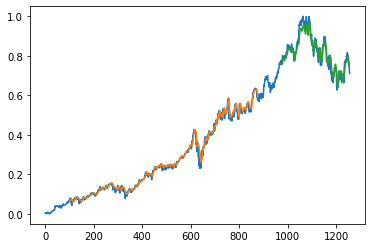

In [50]:
import numpy as np
look_back = 100
trainpredictplot = np.empty_like(df1)
trainpredictplot[:,:] = np.nan
trainpredictplot[look_back:len(train_predict)+look_back, :] = train_predict

# test prediction for plotting
testpredictplot = np.empty_like(df1)
testpredictplot[:,:] = np.nan
testpredictplot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

#ploting prediction
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainpredictplot)
plt.plot(testpredictplot)
plt.show()

# orange ir train data
#green is test data



